# Batch Legal Top2Vec Mockup Model

In [1]:
#pip-install

!pip install top2vec #Check out: https://github.com/ddangelov/Top2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 6.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.1 MB 397 kB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.8 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342160 sha256=f6587e362e2590e19daf2bd8922c4e270431fe29d28123e3d80b206f7dc7fd68
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9bdac90b2b709e110dbe85cedb5b9a8a62b65990c4aeed77dd1d5efd8865314a
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Create

In [13]:
!pip install top2vec[sentence_encoders]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 4.3 MB/s 
     |████████████████████████████████| 462 kB 60.7 MB/s 
     |████████████████████████████████| 511.7 MB 5.1 kB/s 
     |████████████████████████████████| 511.7 MB 4.0 kB/s 
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 4.9 MB 42.9 MB/s 


In [19]:
!pip install tensorflow tensorflow_hub tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
#Imports

import pandas as pd
import nltk
from bs4 import BeautifulSoup

from nltk.tokenize import punkt, sent_tokenize
from nltk.corpus import stopwords 

from top2vec import Top2Vec

In [2]:
#Loading html-file + converting it into txt

file = open("/content/test_data.html", "r")
data = BeautifulSoup(file)
as_txt = data.get_text()

In [ ]:
as_txt

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#Tokenizing the sentences

as_sentences = sent_tokenize(as_txt)

In [ ]:
as_sentences

In [5]:
#Model Training

model = Top2Vec(as_sentences, embedding_model='universal-sentence-encoder')

2022-05-31 12:08:41,845 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-05-31 12:08:41,878 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-05-31 12:09:10,409 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-31 12:09:13,557 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

In [6]:
#Get Topic Sizes

topic_sizes, topic_nums = model.get_topic_sizes()

In [9]:
topic_nums

array([0, 1])

In [10]:
topic_sizes

array([182,  58])

In [7]:
#Get Topics

topic_words, word_scores, topic_nums = model.get_topics()

In [8]:
topic_words

array([['residence', 'member', 'state', 'article', 'members', 'union',
        'their', 'of', 'family', 'for', 'to', 'host', 'shall', 'and',
        'as', 'be', 'the', 'in', 'right', 'not', 'or', 'by', 'on', 'are'],
       ['on', 'not', 'of', 'in', 'the', 'by', 'are', 'as', 'to', 'and',
        'right', 'article', 'or', 'shall', 'be', 'for', 'state',
        'member', 'members', 'their', 'union', 'residence', 'host',
        'family']], dtype='<U9')

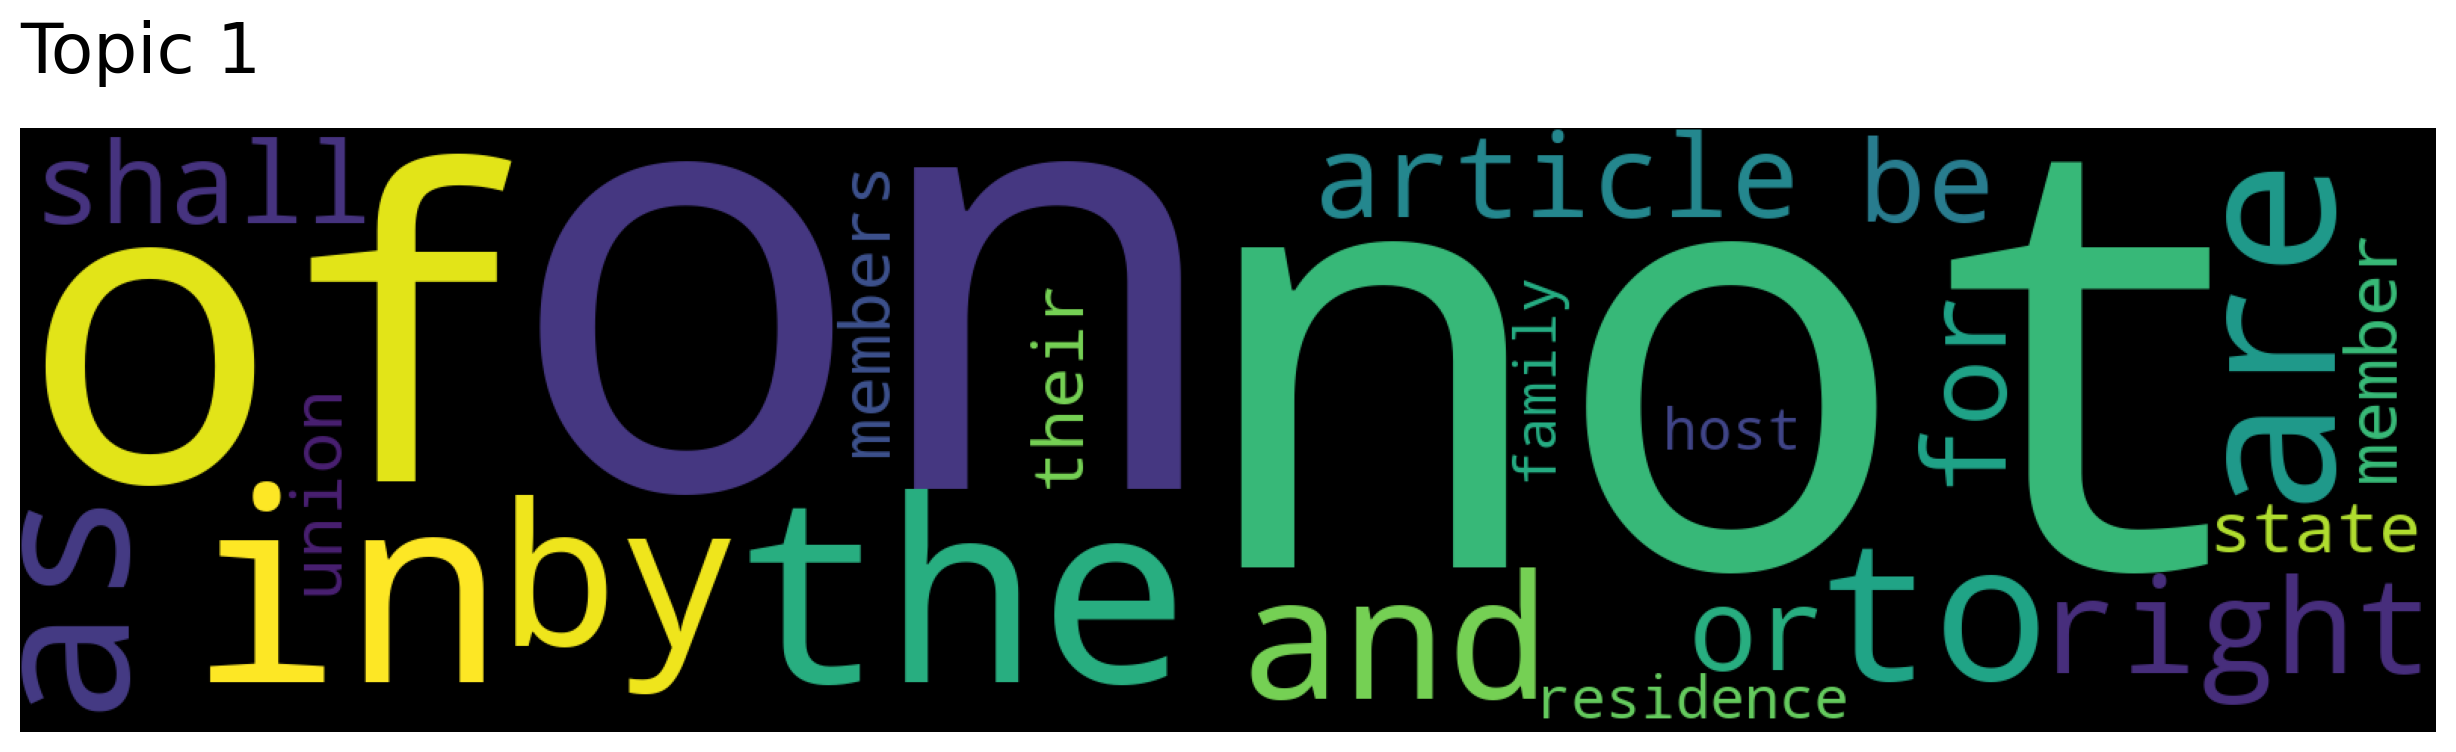

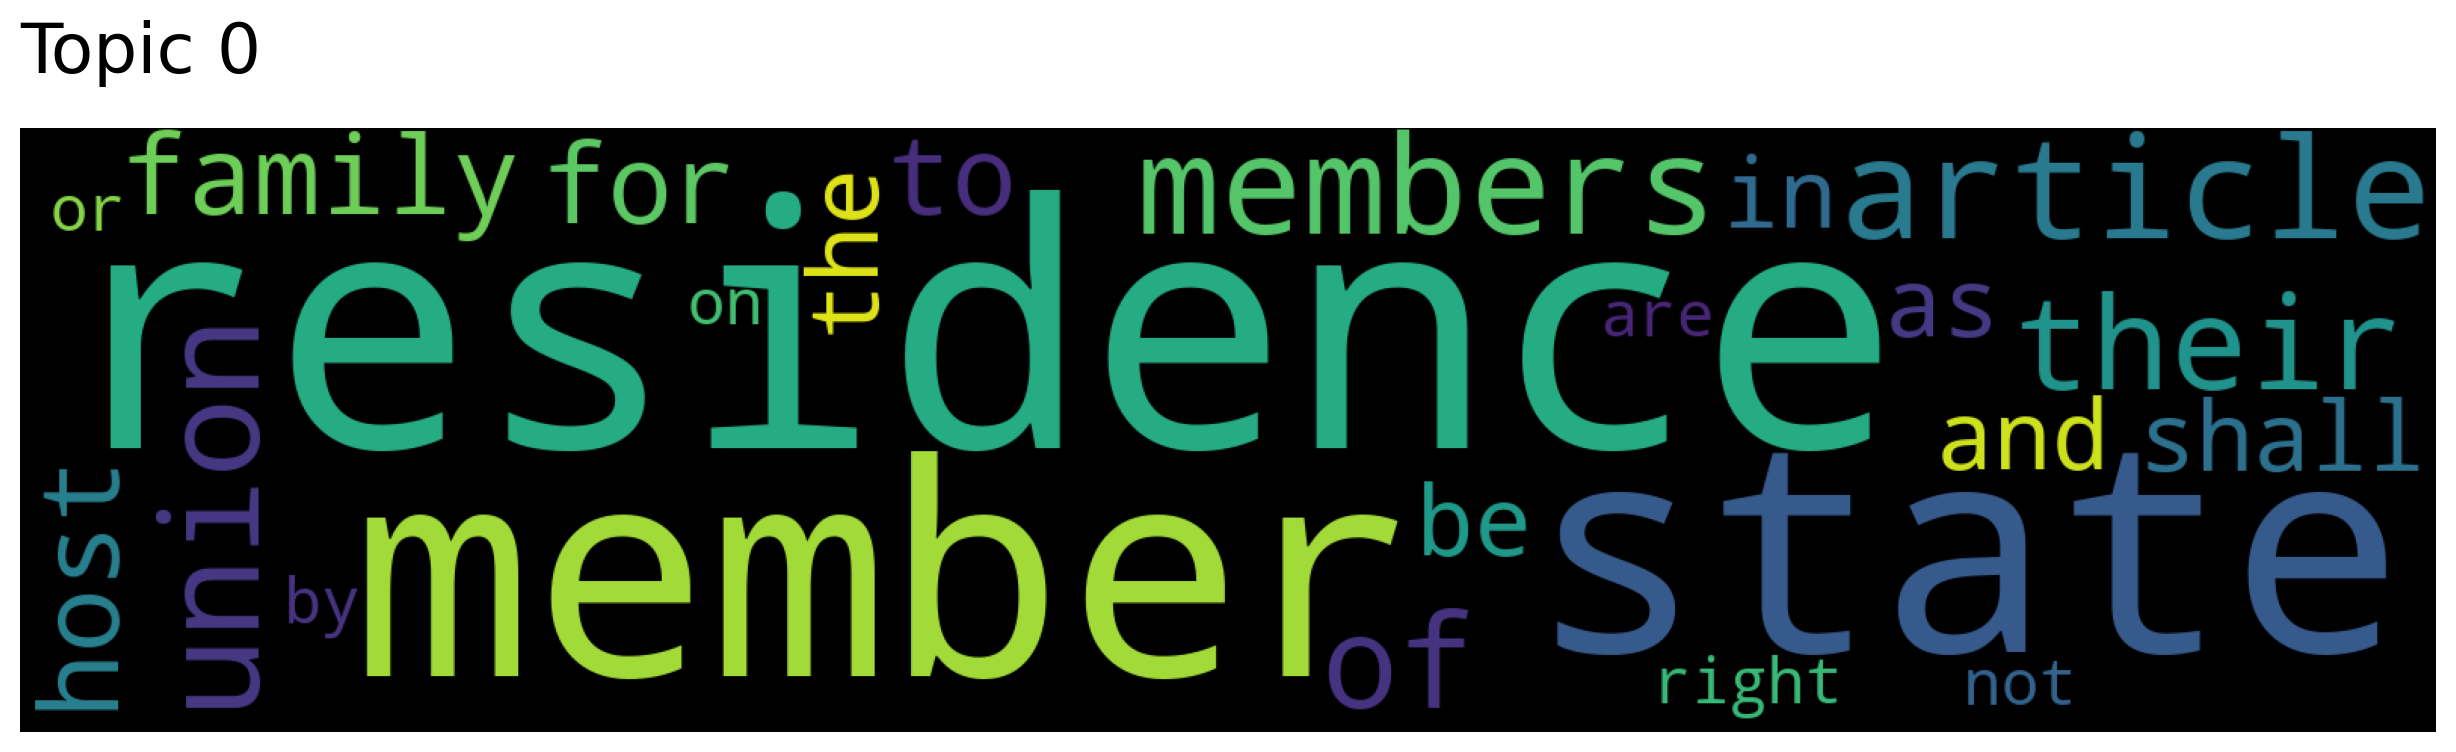

In [17]:
#Generate Word Clouds

topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["host"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)